In [8]:
## Importing Libraries

In [ ]:
import math

import numpy as np
import pandas as pd
import scipy.stats

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import model_selection

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [9]:
##EXTRACTING the data from dataset

In [10]:
metrics_data = pd.read_csv("jm1.csv")
metrics_data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [ ]:
## Preprocessing the data

In [ ]:
metrics_data.isnull().sum()

In [11]:
metrics_data.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,10885.000000,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,0.224766,2.046465e+03,26.252274,2.737529,4.62554,0.370785
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,0.646408,2.413154e+04,59.611201,9.008608,9.96813,1.907969
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,0.020000,9.000000e+00,4.000000,0.000000,0.00000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,0.070000,1.128300e+02,13.000000,0.000000,2.00000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,0.210000,6.342500e+02,28.000000,2.000000,5.00000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.00000,108.000000


loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [15]:
drop_col = ['uniq_Op', 'uniq_Opnd', 'total_Op','total_Opnd','branchCount']
metrics_data = metrics_data.drop(drop_col, axis = 1)

In [16]:
metrics_data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,0.38,1279.39,51,10,8,1,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,1.45,4122.37,129,29,28,2,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,0.20,572.07,28,1,6,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,0.08,98.38,13,0,2,0,False
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,0.04,59.43,5,0,2,0,False
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,0.17,762.04,29,1,10,0,False
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,0.05,68.98,6,0,2,0,False


In [17]:
metrics_data.isnull()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,defects
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10881,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
trace = go.Histogram(
    x = metrics_data.defects,
    opacity = 0.75,
    name = "Defects",
    marker = dict(color = 'green'))

hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Defects',
                   xaxis = dict(title = 'True - False'),
                   yaxis = dict(title = 'Frequency'),
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

In [19]:
def defects_pre(value):
    if value == True:
        return 1
    else:
        return 0
metrics_data['defect_num'] = metrics_data['defects'].map(defects_pre)

In [20]:
metrics_data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,defects,defect_num
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,False,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,True,1
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,0.38,1279.39,51,10,8,1,True,1
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,1.45,4122.37,129,29,28,2,True,1
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,0.20,572.07,28,1,6,0,True,1


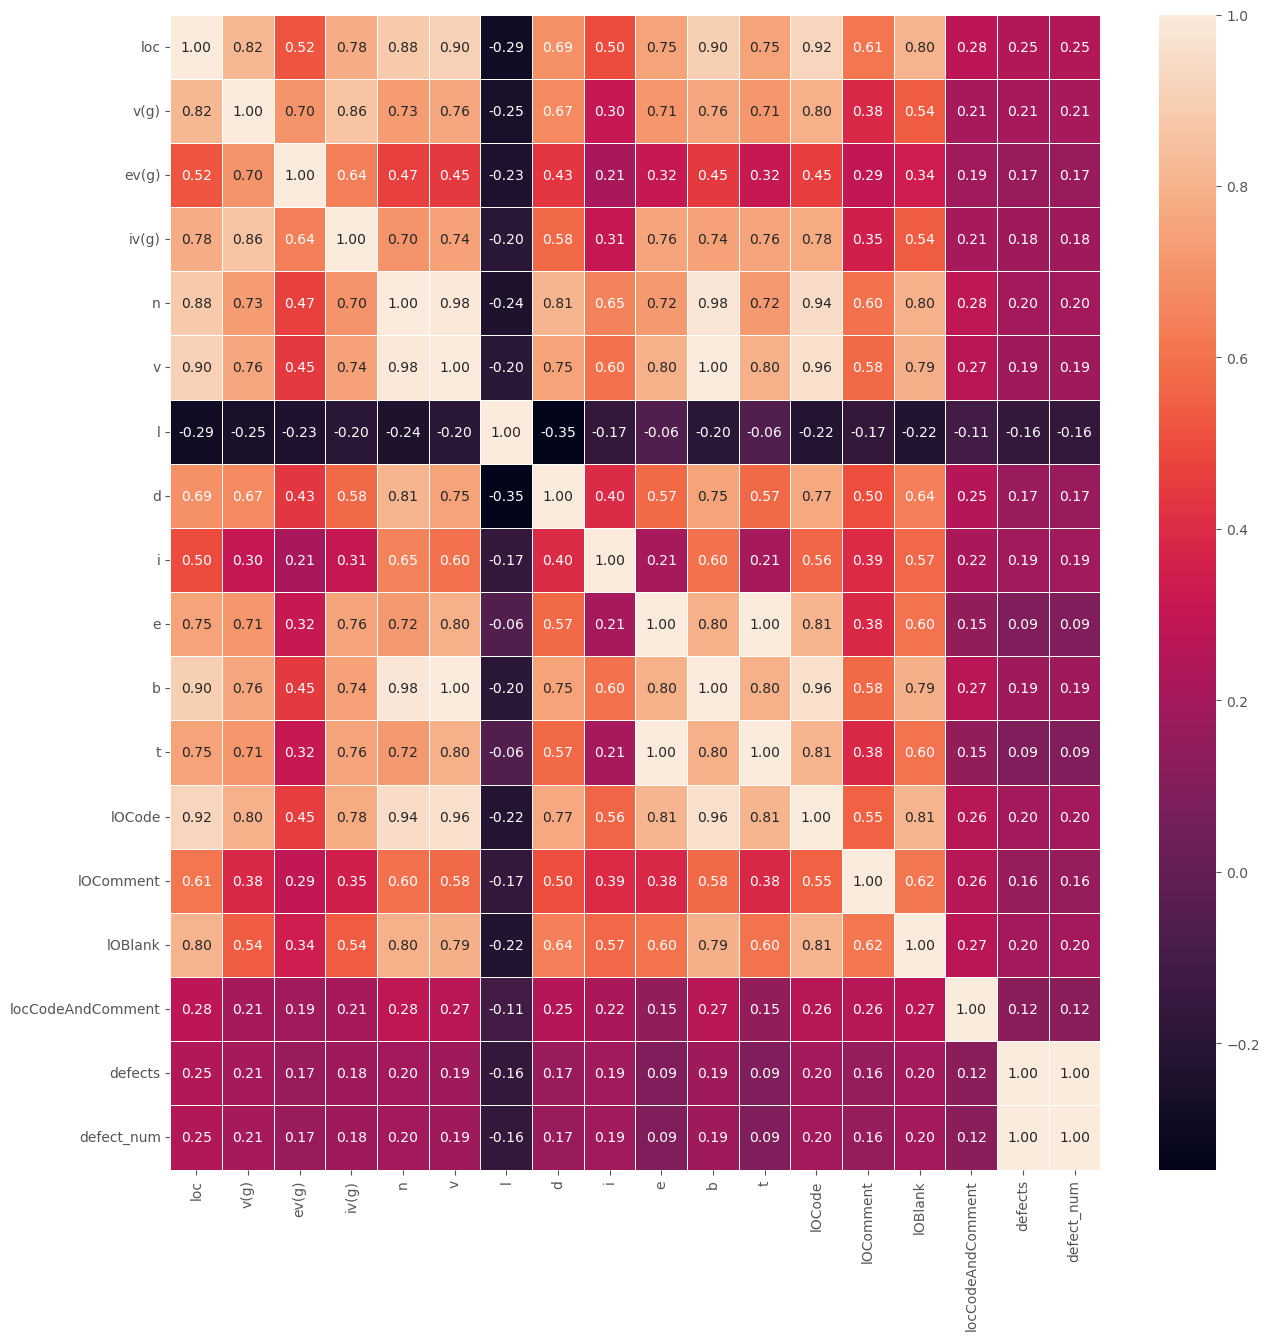

In [21]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(metrics_data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

In [22]:
## Extarcting independent and dependent varibles

In [23]:
drop_col = ['l', 'e', 't', 'lOComment', 'lOBlank', 'locCodeAndComment','v','n','d','i','b','lOCode','defects','defect_num']
X = metrics_data.drop(drop_col, axis = 1)
y = metrics_data['defect_num']
X

,loc,v(g),ev(g),iv(g)
0,1.1,1.4,1.4,1.4
1,1.0,1.0,1.0,1.0
2,72.0,7.0,1.0,6.0
3,190.0,3.0,1.0,3.0
4,37.0,4.0,1.0,4.0
...,...,...,...,...
10880,18.0,4.0,1.0,4.0
10881,9.0,2.0,1.0,2.0
10882,42.0,4.0,1.0,2.0
10883,10.0,1.0,1.0,1.0


In [24]:
## Training and testing the data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [26]:
## Performance checking Function

In [27]:
def check_performance(classifier, X_train, y_train, X_test, y_test, idx):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:,1]


    classifier_cm = confusion_matrix(y_test, y_pred)

    print(classification_report(y_test, y_pred))
    print('')
    print('-----------------------------------------------------')
    
    print(f'Accuracy Score : {round(accuracy_score(y_test, y_pred),3)}')
    print(f'Precision : {round(precision_score(y_test, y_pred),3)}')
    print(f'Recall : {round(recall_score(y_test, y_pred),3)}')
    print(f'f1_score : {round(f1_score(y_test, y_pred),3)}')
    print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
    
    # Roc curve
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    sns.set_theme(style = 'white')
    plt.figure(figsize = (8, 8))
    plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    


In [28]:

## Decesion Tree Model


              precision    recall  f1-score   support

           0       0.82      0.98      0.90      2632
           1       0.63      0.13      0.21       634

    accuracy                           0.82      3266
   macro avg       0.73      0.55      0.55      3266
weighted avg       0.79      0.82      0.76      3266


-----------------------------------------------------
Accuracy Score : 0.816
Precision : 0.628
Recall : 0.128
f1_score : 0.212
ROC AUC score: 0.71


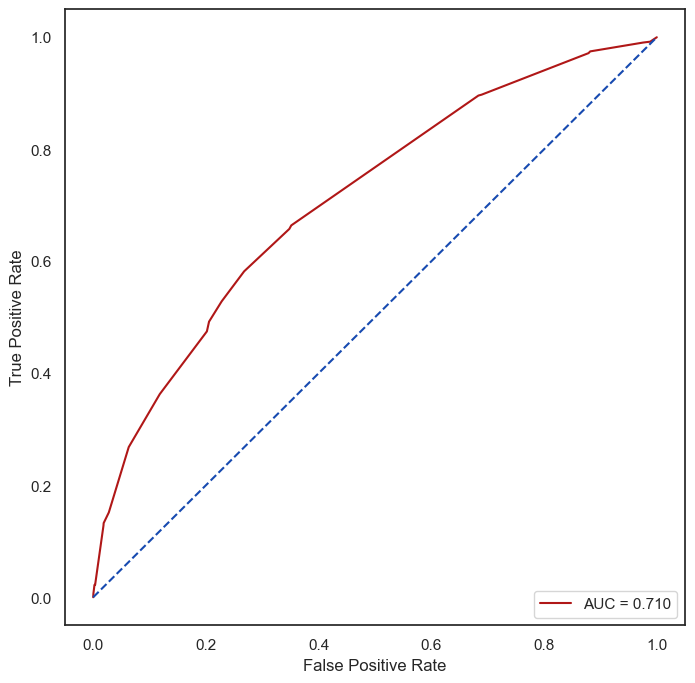

In [29]:
from sklearn.tree import DecisionTreeClassifier
check_performance(DecisionTreeClassifier(random_state = 22, max_depth = 5), X_train, y_train, X_test, y_test, 0)

In [30]:
## Random Forest Model

              precision    recall  f1-score   support

           0       0.82      0.99      0.89      2632
           1       0.60      0.08      0.13       634

    accuracy                           0.81      3266
   macro avg       0.71      0.53      0.51      3266
weighted avg       0.77      0.81      0.75      3266


-----------------------------------------------------
Accuracy Score : 0.811
Precision : 0.6
Recall : 0.076
f1_score : 0.134
ROC AUC score: 0.727


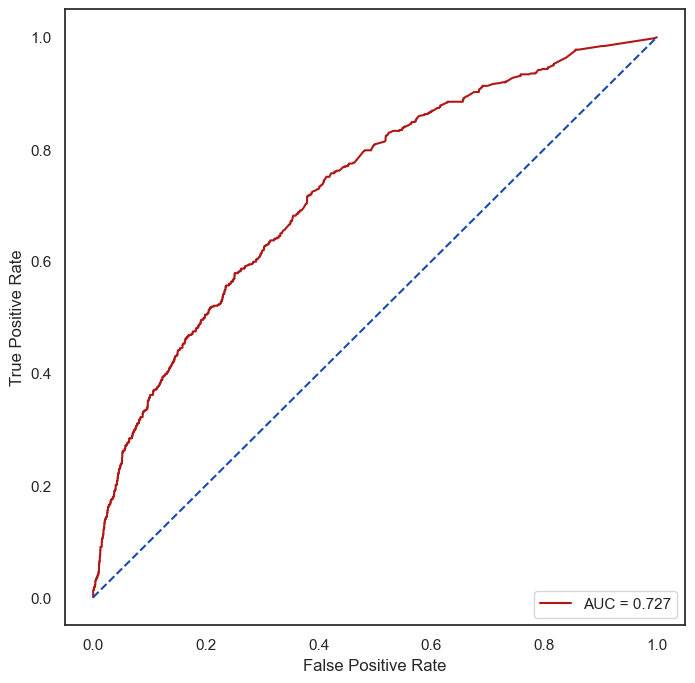

In [31]:
from sklearn.ensemble import RandomForestClassifier
check_performance(RandomForestClassifier(random_state = 22, max_depth = 5), X_train, y_train, X_test, y_test, 1)

In [32]:
## Naive Bayes Model

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2632
           1       0.53      0.20      0.29       634

    accuracy                           0.81      3266
   macro avg       0.68      0.58      0.59      3266
weighted avg       0.77      0.81      0.77      3266


-----------------------------------------------------
Accuracy Score : 0.81
Precision : 0.525
Recall : 0.196
f1_score : 0.285
ROC AUC score: 0.631


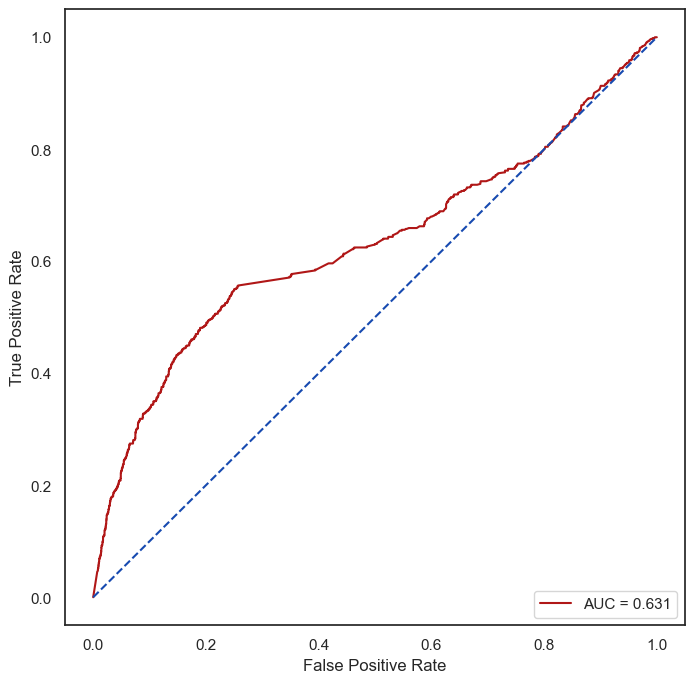

In [33]:
from sklearn.naive_bayes import GaussianNB
check_performance(GaussianNB(), X_train, y_train, X_test, y_test, 2)

In [34]:
## XG Boost model

In [35]:
#pip install xgboost

In [36]:
from xgboost import XGBRegressor
import xgboost as xgb


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2632
           1       0.53      0.18      0.27       634

    accuracy                           0.81      3266
   macro avg       0.68      0.57      0.58      3266
weighted avg       0.77      0.81      0.77      3266


-----------------------------------------------------
Accuracy Score : 0.81
Precision : 0.53
Recall : 0.18
f1_score : 0.269
ROC AUC score: 0.696


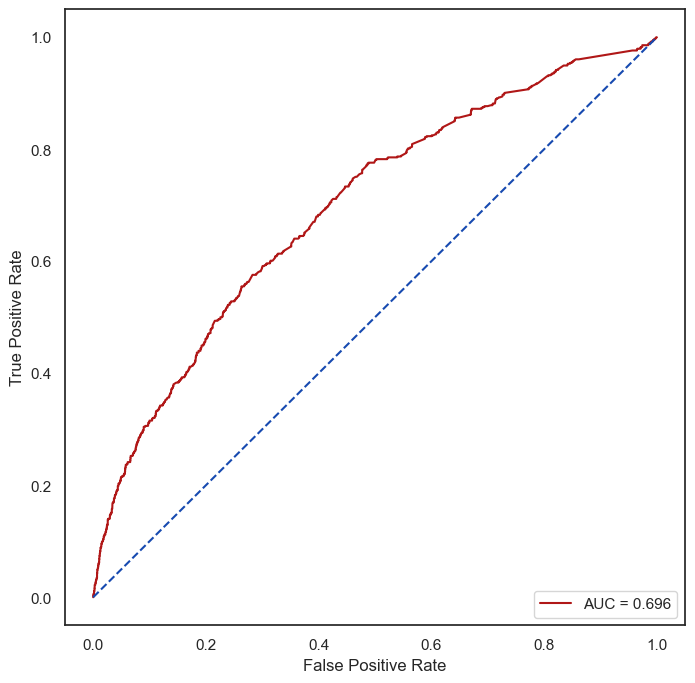

In [37]:
xgb_classifier = xgb.XGBClassifier()
check_performance(xgb_classifier, X_train, y_train, X_test, y_test , 2)

In [38]:
##ACCuracy Graph For Three phases for all models

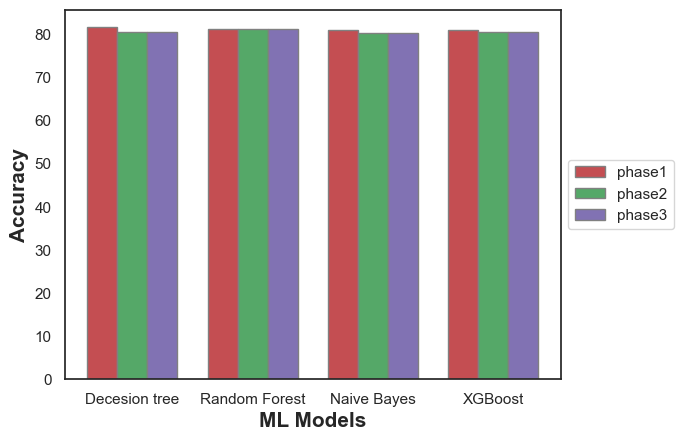

In [39]:
barWidth = 0.25
phase1 = [81.6,81.1,81.0,81.0]
phase2 = [80.6, 81.1, 80.3, 80.5]
phase3 = [80.8, 81.5, 80.7, 80.9]
br1 = np.arange(len(phase1))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# Make the plot
plt.bar(br1, phase1, color ='r', width = barWidth,
        edgecolor ='grey', label ='phase1')
plt.bar(br2, phase2, color ='g', width = barWidth,
        edgecolor ='grey', label ='phase2')
plt.bar(br3, phase2, color ='m', width = barWidth,
        edgecolor ='grey', label ='phase3')

 
# Adding Xticks
plt.xlabel('ML Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(phase1))],
        ["Decesion tree","Random Forest","Naive Bayes","XGBoost"])
 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()